___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Rolling Statistics

A very common process with time series is to create data based off of a rolling mean. Let's show you how to do this easily with pandas!

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
# Best way to read in data with time series index!
df = pd.read_csv('../DATA/WMT.csv',index_col='Date',parse_dates=True)

In [10]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,72.760002,73.080002,72.199997,73.000000,65.758080,9570900
2016-09-07,73.000000,73.050003,72.010002,72.059998,64.911324,9618300
2016-09-08,71.889999,72.320000,71.709999,71.830002,64.704163,9661200
2016-09-09,71.320000,71.510002,70.300003,70.300003,63.325943,12172600
2016-09-12,70.790001,72.239998,70.720001,71.940002,64.803238,10864000


<AxesSubplot:xlabel='Date'>

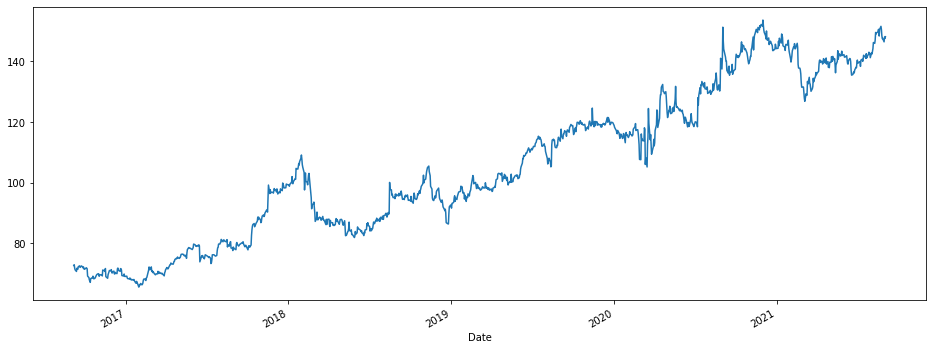

In [11]:
df['Open'].plot(figsize=(16,6))

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [12]:
# 7 day rolling mean
df.rolling(7).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-06,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-07,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-08,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-09,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-12,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-13,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-14,71.888572,72.310001,71.355715,71.730000,64.614072,9.482200e+06
2016-09-15,71.705715,72.235715,71.221430,71.644286,64.536861,9.157157e+06
2016-09-16,71.608572,72.222857,71.251430,71.760001,64.641098,9.773929e+06


<AxesSubplot:xlabel='Date'>

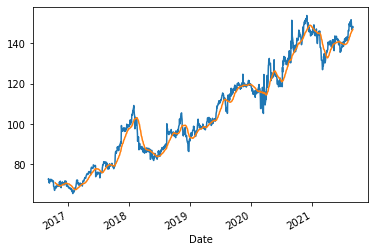

In [13]:
df['Open'].plot()
df.rolling(window=30).mean()['Close'].plot()

Easiest way to add a legend is to make this rolling value a new column, then pandas does it automatically!

<AxesSubplot:xlabel='Date'>

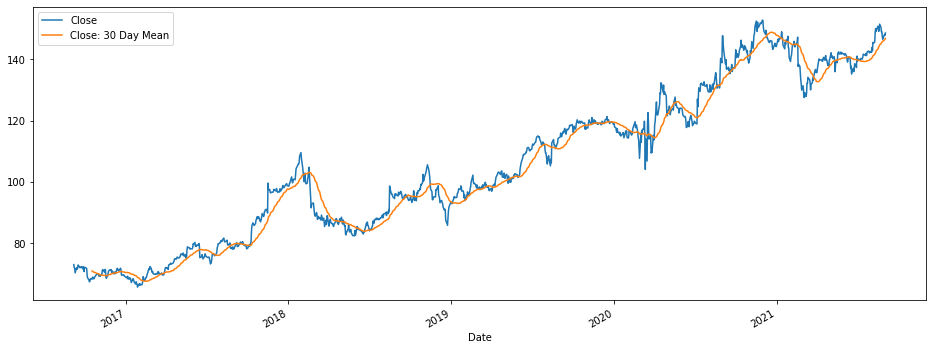

In [14]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

## Bollinger Bands

We will talk a lot more about financial analysis plots and technical indicators, but here is one you may want to explore on your own for now.

**NOTE: This will be featured in an exercise later on, we leave it up to you for now to explore it, but keep in mind, we will formally go over this in more detail later on, Bolinger Bands won't be mentioned in the video.**

More info : http://www.investopedia.com/terms/b/bollingerbands.asp

*Developed by John Bollinger, Bollinger Bands® are volatility bands placed above and below a moving average. Volatility is based on the standard deviation, which changes as volatility increases and decreases. The bands automatically widen when volatility increases and narrow when volatility decreases. This dynamic nature of Bollinger Bands also means they can be used on different securities with the standard settings. For signals, Bollinger Bands can be used to identify Tops and Bottoms or to determine the strength of the trend.*

*Bollinger Bands reflect direction with the 20-period SMA and volatility with the upper/lower bands. As such, they can be used to determine if prices are relatively high or low. According to Bollinger, the bands should contain 88-89% of price action, which makes a move outside the bands significant. Technically, prices are relatively high when above the upper band and relatively low when below the lower band. However, relatively high should not be regarded as bearish or as a sell signal. Likewise, relatively low should not be considered bullish or as a buy signal. Prices are high or low for a reason. As with other indicators, Bollinger Bands are not meant to be used as a stand alone tool. *

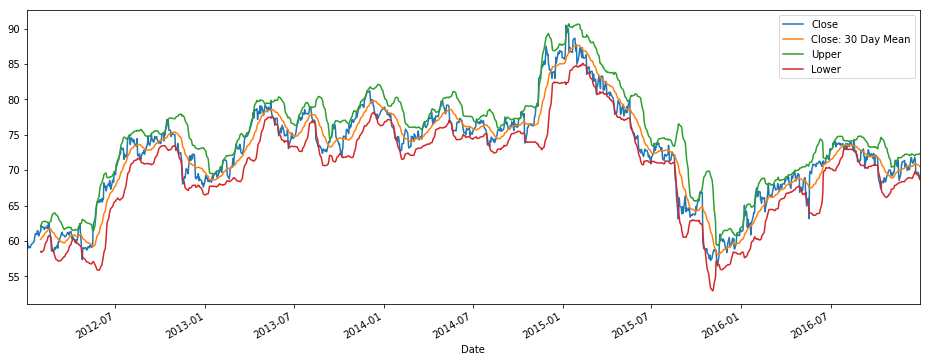

In [9]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['Close: 30 Day Mean'] + 2*df['Close'].rolling(window=20).std()
df['Lower'] = df['Close: 30 Day Mean'] - 2*df['Close'].rolling(window=20).std()
df[['Close','Close: 30 Day Mean','Upper','Lower']].plot(figsize=(16,6))

For expanding operations, it doesn't help very much to visualize this against the daily data, but instead its a good way to get an idea of the "stability" of a stock. This idea of stability and volatility is something we are going to be exploring heavily in the next project, so let's jump straight into it!